STEP 0 – Checking required Python modules
-----------------------------------------
All required modules are available.

STEP 1 – Loading the dataset
----------------------------


Enter the file name or path (e.g. data.csv or data.xlsx):  rewizjonizm_ideologia_network.xlsx
Enter the sheet name in the Excel file:  Sheet1



File 'rewizjonizm_ideologia_network.xlsx' successfully loaded.

Columns in the dataset:
['Source', 'typ_źródła', 'active_passive1', 'państwo_źródła', 'cel_wpływu', 'active_passive2', 'typ_celu', 'państwo_celu', 'charakter_wpływu', 'Coś_co_wywiera_wpływ', 'podlega_wpływowi', 'narzędzie_wpływu', 'ranga_wplywu', 'stopień_pewności', 'przed_1945', '1945_1991', 'po_1991', 'Unnamed: 17', 'po_2022', 'cytowanie']

STEP 2 – Selecting 'cause' and 'target' columns
------------------------------------------------


Enter the column name for 'cause' (source of the edge):  Source
Enter the column name for 'target' (destination of the edge):  cel_wpływu



Number of rows with non-missing cause & target: 1002
Number of unique directed edges (cause → target): 969

STEP 3 – Building the directed graph
-------------------------------------
Graph created with 422 nodes and 969 edges.

STEP 4 – Raw visualization of the full graph
--------------------------------------------



/tmp/ipykernel_409765/3865501365.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


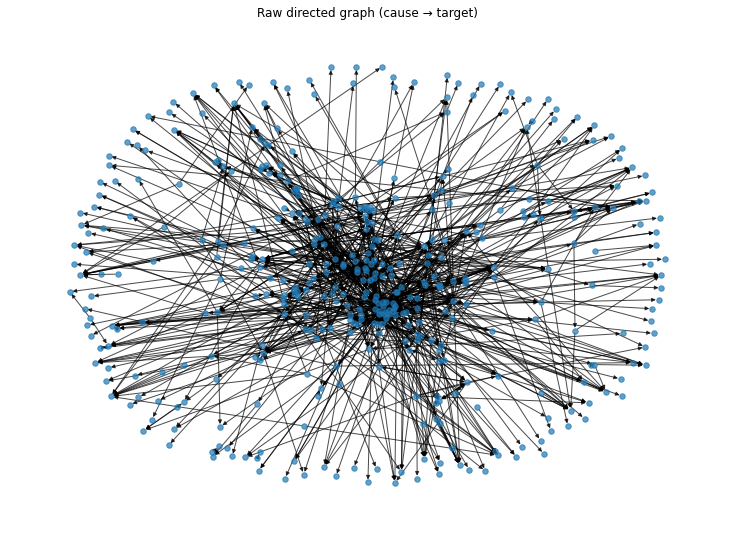

STEP 5 – Focused visualization of the most central nodes
--------------------------------------------------------
Visualizing the subgraph induced by the top 20 nodes by degree centrality.



/tmp/ipykernel_409765/3865501365.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


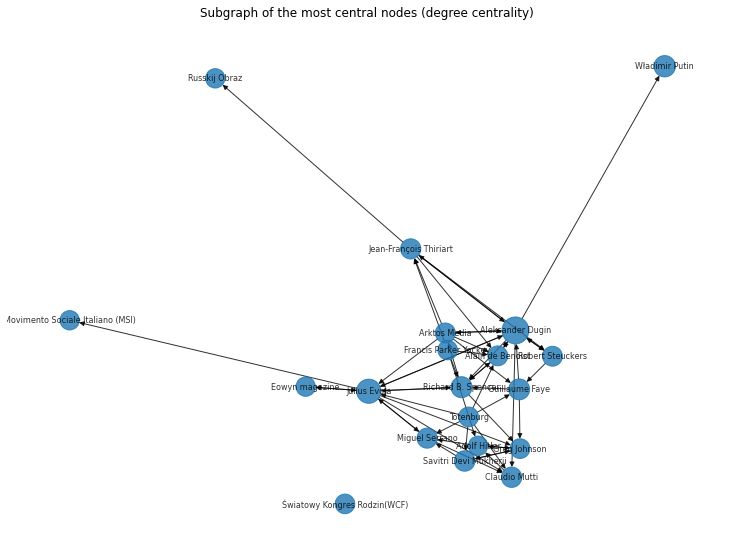

STEP 6 – Centrality measures (degree, betweenness, closeness)
--------------------------------------------------------------
Computing betweenness centrality (this may take some time for large graphs)...
Computing closeness centrality...

Plotting top nodes by degree centrality...


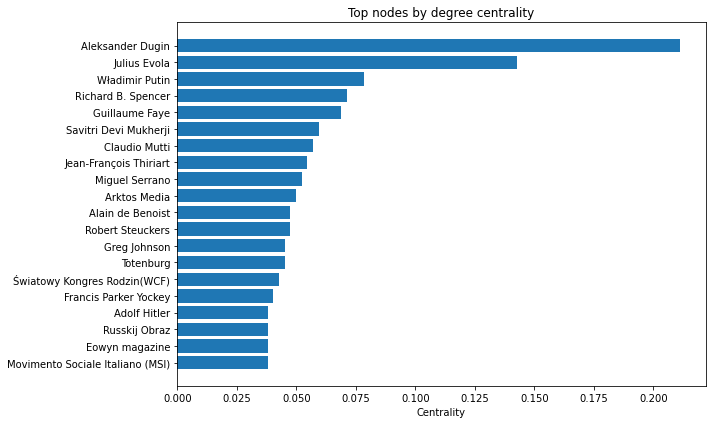

Plotting top nodes by betweenness centrality...


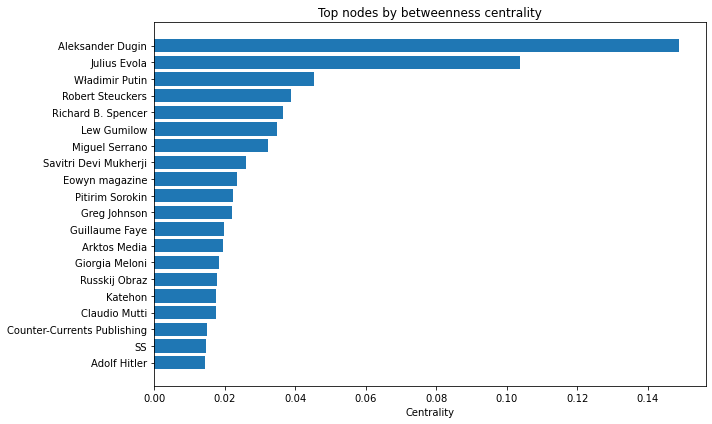

Plotting top nodes by closeness centrality...


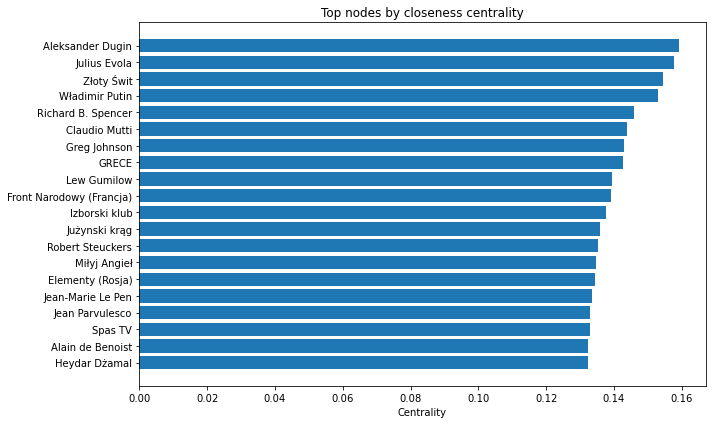

STEP 7 – Community detection (clusters)
----------------------------------------

Number of detected communities (clusters): 12
Sizes of the first communities: [91, 68, 53, 48, 33]


/tmp/ipykernel_409765/3865501365.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


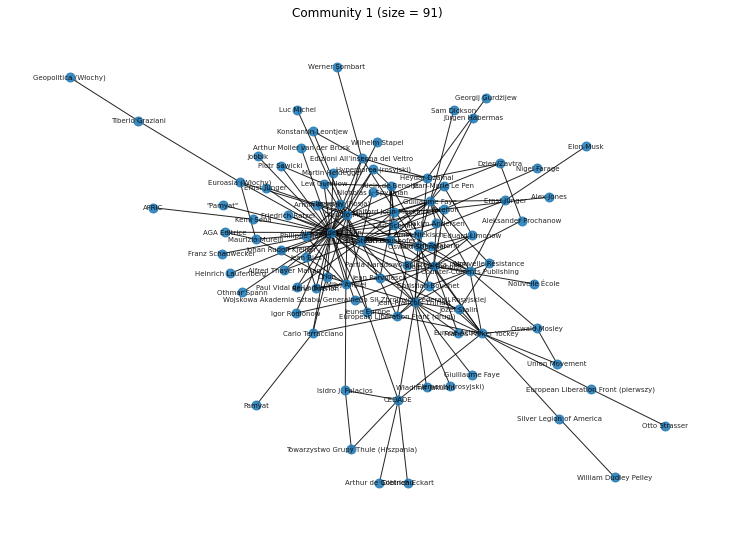

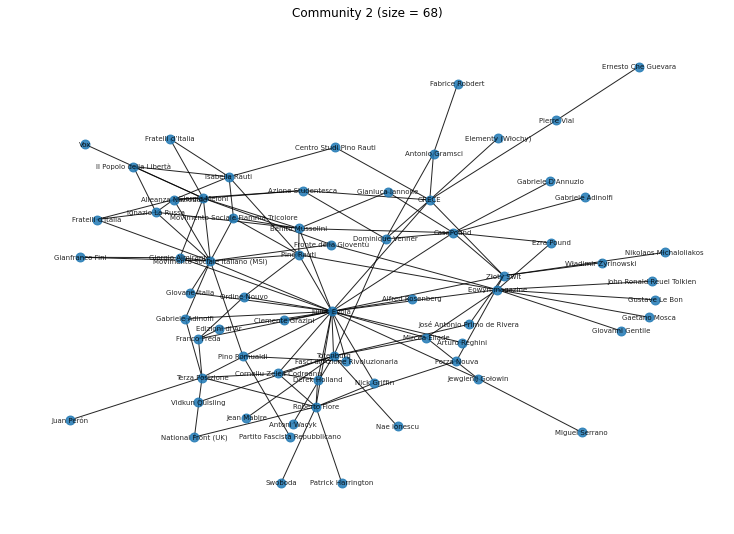

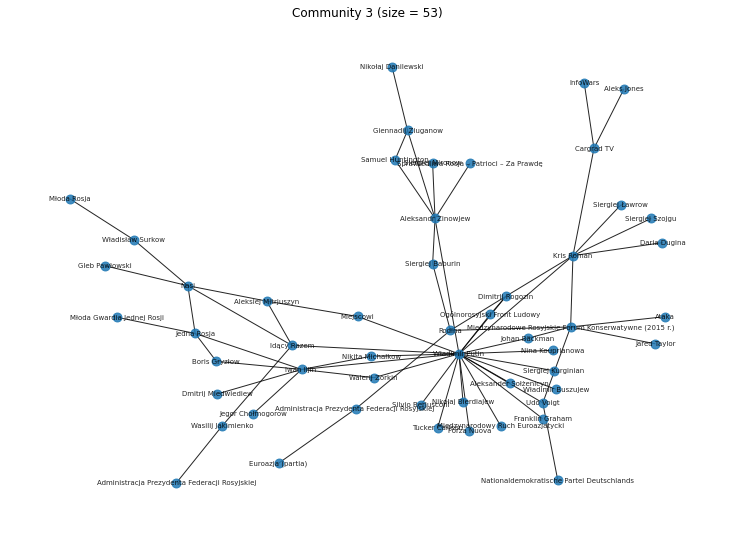

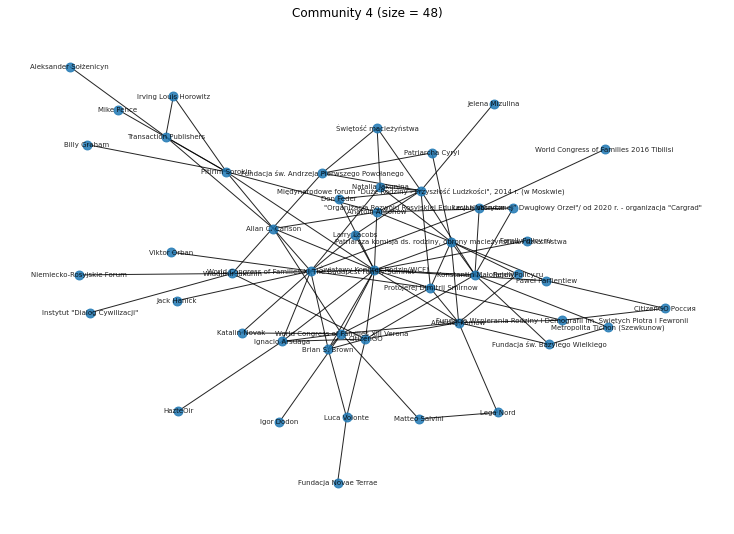


STEP 8 – Extracting a simple backbone of the graph
---------------------------------------------------
Backbone defined as edges with weight ≥ 75th percentile (1.00).
Backbone graph has 422 nodes and 969 edges.



/tmp/ipykernel_409765/3865501365.py:353: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


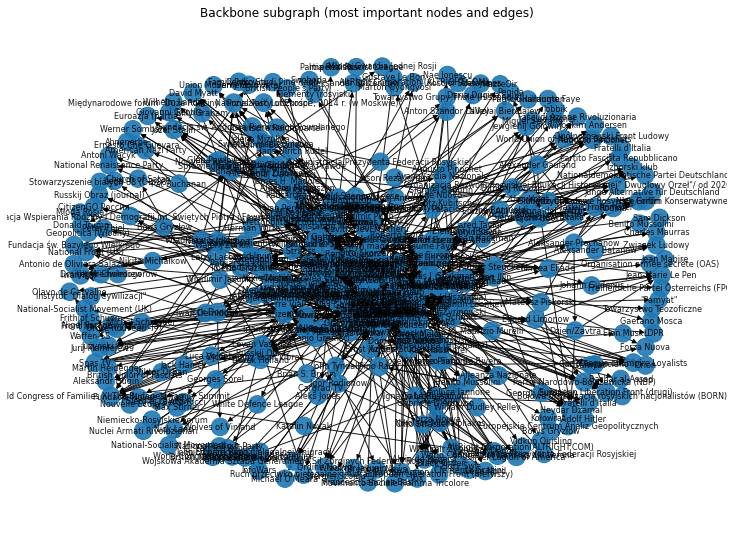


STEP 9 – Summary and interpretation template (English)
-------------------------------------------------------

Graph overview:
- Number of nodes: 422
- Number of directed edges: 969

Key nodes by centrality:
- Degree centrality (top nodes): Aleksander Dugin (≈ 0.211), Julius Evola (≈ 0.143), Władimir Putin (≈ 0.078), Richard B. Spencer (≈ 0.071), Guillaume Faye (≈ 0.069)
- Betweenness centrality (top nodes): Aleksander Dugin (≈ 0.149), Julius Evola (≈ 0.104), Władimir Putin (≈ 0.045), Robert Steuckers (≈ 0.039), Richard B. Spencer (≈ 0.037)
- Closeness centrality (top nodes): Aleksander Dugin (≈ 0.159), Julius Evola (≈ 0.158), Złoty Świt (≈ 0.154), Władimir Putin (≈ 0.153), Richard B. Spencer (≈ 0.146)

Communities (clusters):
- Number of detected communities: 12
- Sizes of the largest communities: [91, 68, 53, 48, 33]

Interpretation hint:
Each community groups nodes that are more densely connected to each other
than to the rest of the graph. In a historical context, communities may

In [2]:
# Network analysis notebook – directed graph from "cause" → "target"
# ------------------------------------------------------------------
# This notebook:
# 1. Checks if the required Python modules are installed.
# 2. Asks for a CSV or XLSX file and (for Excel) a sheet name.
# 3. Asks for the names of the "cause" and "target" columns.
# 4. Builds a directed NetworkX graph from cause → target pairs.
# 5. Shows a "raw" visualization of the full graph.
# 6. Shows a focused visualization for the most central nodes.
# 7. Computes centrality measures (degree, betweenness, closeness)
#    and visualizes the top 20 nodes for each.
# 8. Detects communities (clusters) and visualizes subgraphs.
# 9. Extracts a simple "backbone" of the graph.
# 10. Prints an English summary of the main results.

import sys

print("STEP 0 – Checking required Python modules")
print("-----------------------------------------")

required_modules = ["pandas", "numpy", "matplotlib", "networkx"]
missing = []

for mod in required_modules:
    try:
        __import__(mod)
    except ImportError:
        missing.append(mod)

if missing:
    print("\nThe following required modules are missing:")
    for mod in missing:
        print(f"  - {mod}")
    print("\nPlease install them before running the notebook, for example:")
    print("  pip install " + " ".join(missing))
    raise SystemExit("Missing required modules. Install them and re-run this notebook.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community

plt.rcParams["figure.figsize"] = (10, 7)

print("All required modules are available.\n")

# --------------------------------------------------------------
# STEP 1 – Load the data (CSV or XLSX)
# --------------------------------------------------------------

print("STEP 1 – Loading the dataset")
print("----------------------------")

while True:
    file_path = input("Enter the file name or path (e.g. data.csv or data.xlsx): ").strip()

    if not file_path:
        print("Please provide a non-empty file name.")
        continue

    # Determine file type
    if file_path.lower().endswith(".csv"):
        file_type = "csv"
    elif file_path.lower().endswith((".xlsx", ".xls")):
        file_type = "excel"
    else:
        print("Unknown file type. Please use a .csv or .xlsx/.xls file.")
        continue

    try:
        if file_type == "csv":
            df = pd.read_csv(file_path)
        else:
            # Ask for sheet name
            sheet_name = input("Enter the sheet name in the Excel file: ").strip() or None
            try:
                df = pd.read_excel(file_path, sheet_name=sheet_name)
            except ImportError as e:
                print("\nIt seems the Excel engine is missing.")
                print("For .xlsx files, install for example:")
                print("  pip install openpyxl")
                raise SystemExit("Missing Excel engine (e.g. openpyxl).")

        print(f"\nFile '{file_path}' successfully loaded.\n")
        break

    except FileNotFoundError:
        print(f"\nFile not found: {file_path}")
        print("Please check the file name/path and try again.\n")

    except ValueError as e:
        print(f"\nThere was a problem reading the file: {e}")
        print("If this is an Excel file, check the sheet name;")
        print("if this is a CSV file, check the delimiter and encoding.\n")

    except Exception as e:
        print(f"\nUnexpected error while reading the file: {e}")
        print("Please fix the problem (encoding, separator, file format) and try again.\n")

print("Columns in the dataset:")
print(list(df.columns))
print()

# --------------------------------------------------------------
# STEP 2 – Choose 'cause' and 'target' columns
# --------------------------------------------------------------

print("STEP 2 – Selecting 'cause' and 'target' columns")
print("------------------------------------------------")

while True:
    cause_col = input("Enter the column name for 'cause' (source of the edge): ").strip()
    if cause_col in df.columns:
        break
    else:
        print(f"Column '{cause_col}' not found. Available columns:")
        print(list(df.columns))

while True:
    target_col = input("Enter the column name for 'target' (destination of the edge): ").strip()
    if target_col in df.columns:
        break
    else:
        print(f"Column '{target_col}' not found. Available columns:")
        print(list(df.columns))

# Keep only rows where both cause and target are non-missing
edges_df = df[[cause_col, target_col]].dropna()

# Convert to string to avoid issues with mixed types
edges_df[cause_col] = edges_df[cause_col].astype(str)
edges_df[target_col] = edges_df[target_col].astype(str)

print(f"\nNumber of rows with non-missing cause & target: {len(edges_df)}")

if len(edges_df) == 0:
    raise SystemExit("No valid rows for cause/target. Please check your columns and data.")

# Aggregate identical edges to get a simple weight
edges_grouped = (
    edges_df.groupby([cause_col, target_col])
    .size()
    .reset_index(name="weight")
)

print(f"Number of unique directed edges (cause → target): {len(edges_grouped)}\n")

# --------------------------------------------------------------
# STEP 3 – Build a directed graph
# --------------------------------------------------------------

print("STEP 3 – Building the directed graph")
print("-------------------------------------")

G = nx.DiGraph()

for _, row in edges_grouped.iterrows():
    src = row[cause_col]
    dst = row[target_col]
    w = float(row["weight"])
    G.add_edge(src, dst, weight=w)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.\n")

# --------------------------------------------------------------
# STEP 4 – Raw visualization of the full graph
# --------------------------------------------------------------

print("STEP 4 – Raw visualization of the full graph")
print("--------------------------------------------")

if G.number_of_nodes() > 300:
    print("Warning: the graph is quite large; the raw visualization may be hard to read.\n")

pos = nx.spring_layout(G, seed=42)

plt.figure()
nx.draw(
    G,
    pos,
    node_size=30,
    arrowsize=8,
    alpha=0.7,
    with_labels=False
)
plt.title("Raw directed graph (cause → target)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# STEP 5 – Focused visualization: most central nodes
# --------------------------------------------------------------

print("STEP 5 – Focused visualization of the most central nodes")
print("--------------------------------------------------------")

# Degree centrality (for directed graphs this uses total degree)
deg_centrality = nx.degree_centrality(G)

if len(deg_centrality) == 0:
    raise SystemExit("The graph has no nodes. Something went wrong with the data.")

top_n = min(20, len(deg_centrality))
top_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:top_n]

print(f"Visualizing the subgraph induced by the top {top_n} nodes by degree centrality.\n")

H = G.subgraph(top_nodes).copy()
pos_H = nx.spring_layout(H, seed=42)

node_sizes = [300 + 2000 * deg_centrality[n] for n in H.nodes()]

plt.figure()
nx.draw(
    H,
    pos_H,
    node_size=node_sizes,
    arrowsize=10,
    alpha=0.8,
    with_labels=True,
    font_size=8
)
plt.title("Subgraph of the most central nodes (degree centrality)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# STEP 6 – Centrality measures and bar plots
# --------------------------------------------------------------

print("STEP 6 – Centrality measures (degree, betweenness, closeness)")
print("--------------------------------------------------------------")

print("Computing betweenness centrality (this may take some time for large graphs)...")
bet_centrality = nx.betweenness_centrality(G, normalized=True)

print("Computing closeness centrality...")
close_centrality = nx.closeness_centrality(G)

def plot_top_centrality(cent_dict, title, top_k=20):
    items = sorted(cent_dict.items(), key=lambda x: x[1], reverse=True)[:top_k]
    labels = [str(x[0]) for x in items]
    values = [x[1] for x in items]

    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, values)
    plt.yticks(y_pos, labels)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Centrality")
    plt.tight_layout()
    plt.show()

print("\nPlotting top nodes by degree centrality...")
plot_top_centrality(deg_centrality, "Top nodes by degree centrality")

print("Plotting top nodes by betweenness centrality...")
plot_top_centrality(bet_centrality, "Top nodes by betweenness centrality")

print("Plotting top nodes by closeness centrality...")
plot_top_centrality(close_centrality, "Top nodes by closeness centrality")

# --------------------------------------------------------------
# STEP 7 – Community detection (clusters)
# --------------------------------------------------------------

print("STEP 7 – Community detection (clusters)")
print("----------------------------------------")

# Work on an undirected version for community detection
GU = G.to_undirected()

try:
    communities = list(community.greedy_modularity_communities(GU))
except Exception as e:
    print(f"\nCommunity detection failed: {e}")
    communities = []

if communities:
    communities_sorted = sorted(communities, key=len, reverse=True)
    print(f"\nNumber of detected communities (clusters): {len(communities_sorted)}")
    print("Sizes of the first communities:", [len(c) for c in communities_sorted[:5]])

    # Visualize up to 4 largest communities as separate subgraphs
    max_plots = min(4, len(communities_sorted))
    for i in range(max_plots):
        comm = communities_sorted[i]
        subG = GU.subgraph(comm).copy()
        pos_sub = nx.spring_layout(subG, seed=42)

        plt.figure()
        nx.draw(
            subG,
            pos_sub,
            node_size=80,
            with_labels=True,
            font_size=7,
            alpha=0.85
        )
        plt.title(f"Community {i+1} (size = {len(subG.nodes())})")
        plt.tight_layout()
        plt.show()
else:
    print("\nNo communities were detected or community detection failed.")

# --------------------------------------------------------------
# STEP 8 – Extract a simple 'backbone' of the graph
# --------------------------------------------------------------

print("\nSTEP 8 – Extracting a simple backbone of the graph")
print("---------------------------------------------------")

backbone = None

# Check if we have meaningful edge weights
edge_weights = [d.get("weight", 1.0) for _, _, d in G.edges(data=True)]

if len(edge_weights) > 0 and (max(edge_weights) > min(edge_weights)):
    # Use edges with weight above the 75th percentile
    threshold = np.percentile(edge_weights, 75)
    strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get("weight", 1.0) >= threshold]

    if strong_edges:
        backbone = G.edge_subgraph(strong_edges).copy()
        print(f"Backbone defined as edges with weight ≥ 75th percentile ({threshold:.2f}).")
    else:
        backbone = None
else:
    # If all weights are equal (or no weights), use top nodes by degree centrality
    top_backbone_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:min(15, len(G))]
    backbone = G.subgraph(top_backbone_nodes).copy()
    print("Backbone defined as subgraph induced by the top-degree nodes (no meaningful weight differences).")

if backbone is not None and backbone.number_of_nodes() > 0:
    print(f"Backbone graph has {backbone.number_of_nodes()} nodes and {backbone.number_of_edges()} edges.\n")

    pos_back = nx.spring_layout(backbone, seed=42)
    node_sizes_back = [300 + 2000 * deg_centrality.get(n, 0) for n in backbone.nodes()]

    plt.figure()
    nx.draw(
        backbone,
        pos_back,
        node_size=node_sizes_back,
        arrowsize=10,
        alpha=0.9,
        with_labels=True,
        font_size=8
    )
    plt.title("Backbone subgraph (most important nodes and edges)")
    plt.tight_layout()
    plt.show()
else:
    print("Could not construct a meaningful backbone (graph is too small or empty).")

# --------------------------------------------------------------
# STEP 9 – Textual characterization of the results (English)
# --------------------------------------------------------------

print("\nSTEP 9 – Summary and interpretation template (English)")
print("-------------------------------------------------------")

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

print(f"\nGraph overview:")
print(f"- Number of nodes: {n_nodes}")
print(f"- Number of directed edges: {n_edges}")

# Top nodes by centrality
def top_k_str(cent_dict, k=5):
    items = sorted(cent_dict.items(), key=lambda x: x[1], reverse=True)[:k]
    return ", ".join([f"{str(n)} (≈ {v:.3f})" for n, v in items])

print("\nKey nodes by centrality:")
print(f"- Degree centrality (top nodes): {top_k_str(deg_centrality)}")
print(f"- Betweenness centrality (top nodes): {top_k_str(bet_centrality)}")
print(f"- Closeness centrality (top nodes): {top_k_str(close_centrality)}")

if communities:
    print(f"\nCommunities (clusters):")
    print(f"- Number of detected communities: {len(communities_sorted)}")
    print(f"- Sizes of the largest communities: {[len(c) for c in communities_sorted[:5]]}")

    print(
        "\nInterpretation hint:\n"
        "Each community groups nodes that are more densely connected to each other\n"
        "than to the rest of the graph. In a historical context, communities may\n"
        "correspond to clusters of actors, institutions, texts or concepts that\n"
        "interact more intensely within the cluster than across clusters.\n"
    )

if backbone is not None and backbone.number_of_nodes() > 0:
    print("Backbone of the graph:")
    print(f"- Nodes in the backbone: {backbone.number_of_nodes()}")
    print(f"- Edges in the backbone: {backbone.number_of_edges()}")
    print(
        "\nInterpretation hint:\n"
        "The backbone is a simplified version of the network that keeps only the\n"
        "most important nodes and/or edges (either the strongest ties or the most\n"
        "central nodes). It can be read as a structural 'spine' of the network,\n"
        "highlighting the main channels through which influence, information or\n"
        "causal relations flow.\n"
    )

print(
    "General interpretation template:\n"
    "1. Use the degree centrality plots to identify the most connected nodes.\n"
    "   These nodes may represent key actors, institutions, categories or concepts\n"
    "   that participate in many relations ('hubs').\n\n"
    "2. Use the betweenness centrality results to spot nodes that act as bridges\n"
    "   between different parts of the network. In historical research, these\n"
    "   nodes often indicate intermediaries, brokers or boundary figures.\n\n"
    "3. Use closeness centrality to identify nodes that are, on average, at a\n"
    "   short distance from all others. These nodes can be interpreted as\n"
    "   structurally central positions in the overall configuration.\n\n"
    "4. Examine the communities (clusters) to see whether they correspond to\n"
    "   meaningful groupings in your historical material (for example, ideological\n"
    "   camps, regional blocs, professional groups). Try to label the communities\n"
    "   substantively, not just mathematically.\n\n"
    "5. Finally, inspect the backbone to obtain a simplified picture of the\n"
    "   network's core structure. This is often easier to connect to a historical\n"
    "   narrative than the full, dense graph.\n\n"
    "You can now add your own historical interpretation in a separate Markdown cell,\n"
    "linking the structural properties of the network to specific actors, events,\n"
    "discourses or processes in your research."
)
